# DATA ANALYTICS CAPSTONE PROJECT

## Integrating Multi-Source Data and Image Identification for Automated Crop Disease Diagnosis using Deep Learning
### Objectives
* Develop a deep learning model using multi-source data for accurate and efficient crop disease diagnosis. 
* Investigate the effectiveness of different NoSQL databases for storing agricultural data. 
* Explore different deep-learning paradigms to enhance the performance of crop disease diagnosis models.

### ABOUT DATA
Data used is on Mango crop diseases ("Anthracnose disease", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould")

## (A.) RELEVANT LIBRARIES FOR DATA LOADING AND EXPLORATION

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import random
import cv2

## (B.) LOADING IMAGE DATA FROM DATA DIRECTORY

In [3]:
data_dir = r"C:\Users\HP\Desktop\DATA ANALYTICS CAPSTONE PROJECT\DATA-ANALYTICS-CAPSTONE-PROJECT\MangoLeafBD Dataset"
subfolder_names = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy",
                  "Powdery Mildew", "Sooty Mould"]

image_data = []

for subfolder_name in subfolder_names:
    folder_path = os.path.join(data_dir, subfolder_name)
    image_names = os.listdir(folder_path)
    image_count = len(image_names)
    image_info = {"Category": subfolder_name, "Image Count": image_count, "Dimensions": []}
    
    
    random.seed(42)  
    selected_images = random.sample(image_names, 5)
    
    
    for i, image_name in enumerate(selected_images, 1):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        image_info["Dimensions"].append((height, width, channels))
        print(f"Image {i}: Height={height}, Width={width}, Channels={channels}")
    
    
    image_data.append(image_info)
    print()
df_image_info = pd.DataFrame(image_data)

display(df_image_info)

Image 1: Height=320, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=320, Width=240, Channels=3
Image 4: Height=240, Width=320, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=320, Width=240, Channels=3
Image 2: Height=320, Width=240, Channels=3
Image 3: Height=240, Width=320, Channels=3
Image 4: Height=320, Width=240, Channels=3
Image 5: Height=240, Width=320, Channels=3

Image 1: Height=240, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=240, Width=240, Channels=3
Image 4: Height=240, Width=240, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=240, Width=240, Channels=3
Image 2: Height=240, Width=240, Channels=3
Image 3: Height=240, Width=240, Channels=3
Image 4: Height=240, Width=240, Channels=3
Image 5: Height=240, Width=240, Channels=3

Image 1: Height=240, Width=320, Channels=3
Image 2: Height=320, Width=240, Channels=3
Image 3: Height=240, Width=320, Channels=3
Image 4

,Category,Image Count,Dimensions
0,Anthracnose,500,"[(320, 240, 3), (240, 240, 3), (320, 240, 3), ..."
1,Bacterial Canker,500,"[(320, 240, 3), (320, 240, 3), (240, 320, 3), ..."
2,Cutting Weevil,500,"[(240, 240, 3), (240, 240, 3), (240, 240, 3), ..."
3,Die Back,500,"[(240, 240, 3), (240, 240, 3), (240, 240, 3), ..."
4,Gall Midge,500,"[(240, 320, 3), (320, 240, 3), (240, 320, 3), ..."
5,Healthy,500,"[(240, 320, 3), (240, 320, 3), (240, 320, 3), ..."
6,Powdery Mildew,500,"[(320, 240, 3), (240, 240, 3), (240, 240, 3), ..."
7,Sooty Mould,500,"[(320, 240, 3), (240, 320, 3), (320, 240, 3), ..."


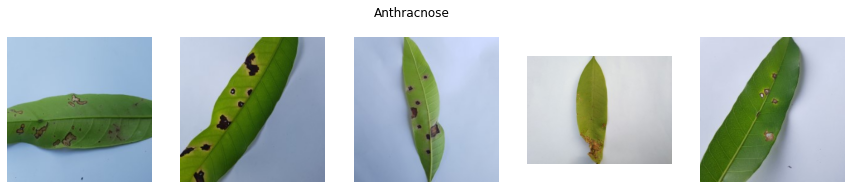

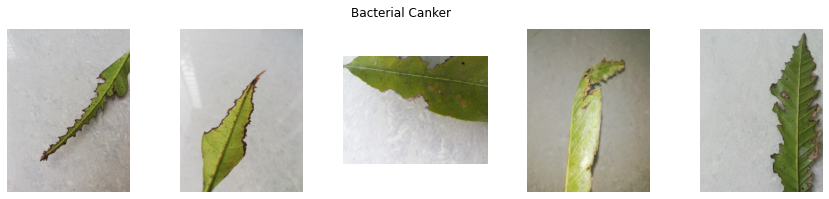

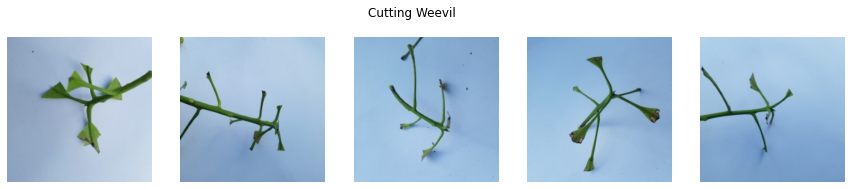

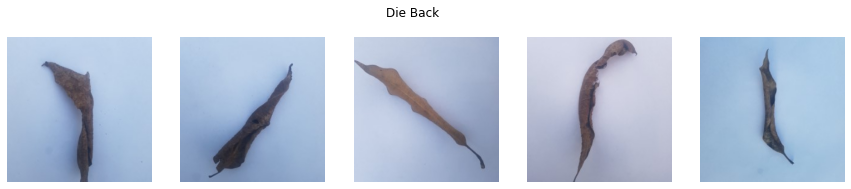

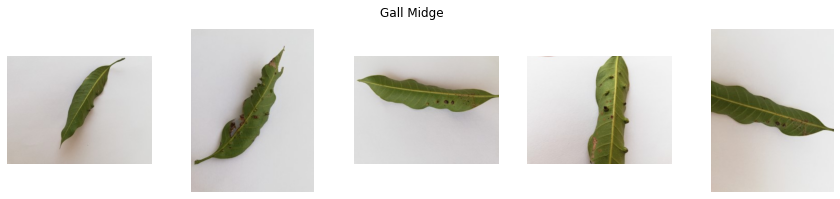

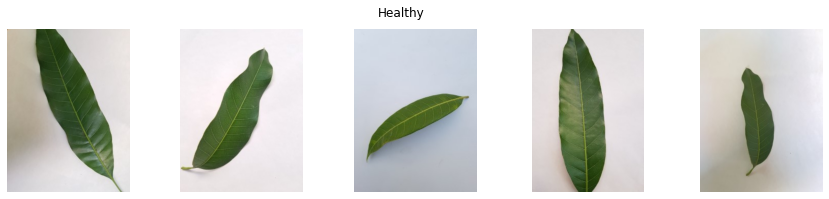

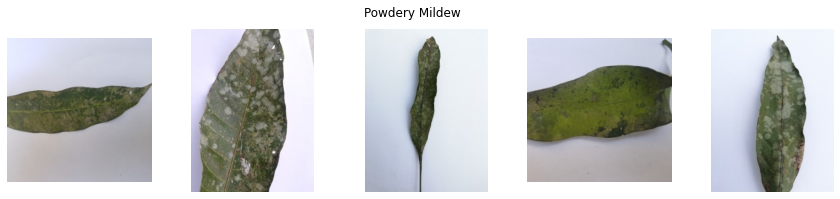

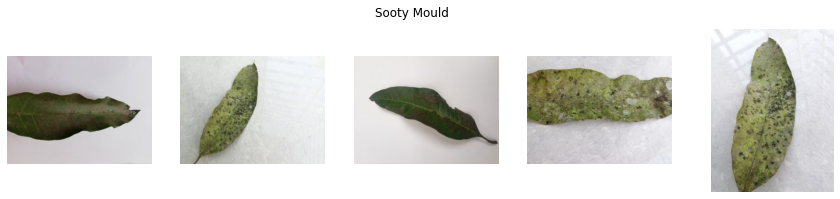

In [4]:

def display_random_images(folder_path, subfolder_name):
    plt.figure(figsize=(15, 3))
    plt.suptitle(subfolder_name)
    for i in range(5):
        
        image_name = random.choice(os.listdir(folder_path))
        image_path = os.path.join(folder_path, image_name)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

for subfolder_name in subfolder_names:
    folder_path = os.path.join(data_dir, subfolder_name)
    display_random_images(folder_path, subfolder_name)

## (C.) PREPROCESSING STAGE

In [9]:
# shape of the DataFrame
print("DataFrame Shape:", df_image_info.shape)


DataFrame Shape: (8, 3)


In [12]:

image_size = (224, 224)

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize(image_size)
    image = np.array(image)
    return image

df_image_info["preprocessed_image"] = df_image_info["Category"].apply(lambda category: [preprocess_image(os.path.join(data_dir, category, image_name)) 
                                                                                        for image_name in os.listdir(os.path.join(data_dir, category))])

num_random_images_per_class = 5
random_images = []

for _, row in df_image_info.iterrows():
    preprocessed_images = row["preprocessed_image"]
    selected_images = preprocessed_images[:num_random_images_per_class]
    random_images.extend(selected_images)

def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

display_images(random_images)


In [17]:
# Confirming the size of the preprocessed images
prepro_image_sizes = [image.shape[:2] for image in random_images]
print("Preprocessed Image Sizes:", prepro_image_sizes)


Preprocessed Image Sizes: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224)]
